In [27]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# read the data

df = pd.read_csv("C:\\Users\\chandu\\Downloads\\movies.csv\\movies.csv")

In [29]:
# Lets look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [33]:
# Lets see if there is missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [35]:
#Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [43]:
#Change data types of our columns

df['budget'] = df['budget'].fillna(0).replace([float('inf'), float('-inf')], 0).astype('int64')
df['gross'] = df['gross'].fillna(0).replace([float('inf'), float('-inf')], 0).astype('int64')



In [161]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,0.0,0.0,0.0,2009,0.0,7.8,1100000.0,0.0,0.0,0.0,0.0,237000000,2847246203,0.0,162.0,0.0
7445,0.0,0.0,0.0,2019,0.0,8.4,903000.0,0.0,0.0,0.0,0.0,356000000,2797501328,0.0,181.0,0.0
3045,0.0,0.0,0.0,1997,0.0,7.8,1100000.0,0.0,0.0,0.0,0.0,200000000,2201647264,0.0,194.0,0.0
6663,0.0,0.0,0.0,2015,0.0,7.8,876000.0,0.0,0.0,0.0,0.0,245000000,2069521700,0.0,138.0,0.0
7244,0.0,0.0,0.0,2018,0.0,8.4,897000.0,0.0,0.0,0.0,0.0,321000000,2048359754,0.0,149.0,0.0


In [53]:
#Create Correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,Octo
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,Apri
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,Octo


In [71]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [57]:
pd.set_option('display.max_rows', None)

In [63]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [159]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,0.0,0.0,0.0,2009,0.0,7.8,1100000.0,0.0,0.0,0.0,0.0,237000000,2847246203,0.0,162.0,0.0
7445,0.0,0.0,0.0,2019,0.0,8.4,903000.0,0.0,0.0,0.0,0.0,356000000,2797501328,0.0,181.0,0.0
3045,0.0,0.0,0.0,1997,0.0,7.8,1100000.0,0.0,0.0,0.0,0.0,200000000,2201647264,0.0,194.0,0.0
6663,0.0,0.0,0.0,2015,0.0,7.8,876000.0,0.0,0.0,0.0,0.0,245000000,2069521700,0.0,138.0,0.0
7244,0.0,0.0,0.0,2018,0.0,8.4,897000.0,0.0,0.0,0.0,0.0,321000000,2048359754,0.0,149.0,0.0


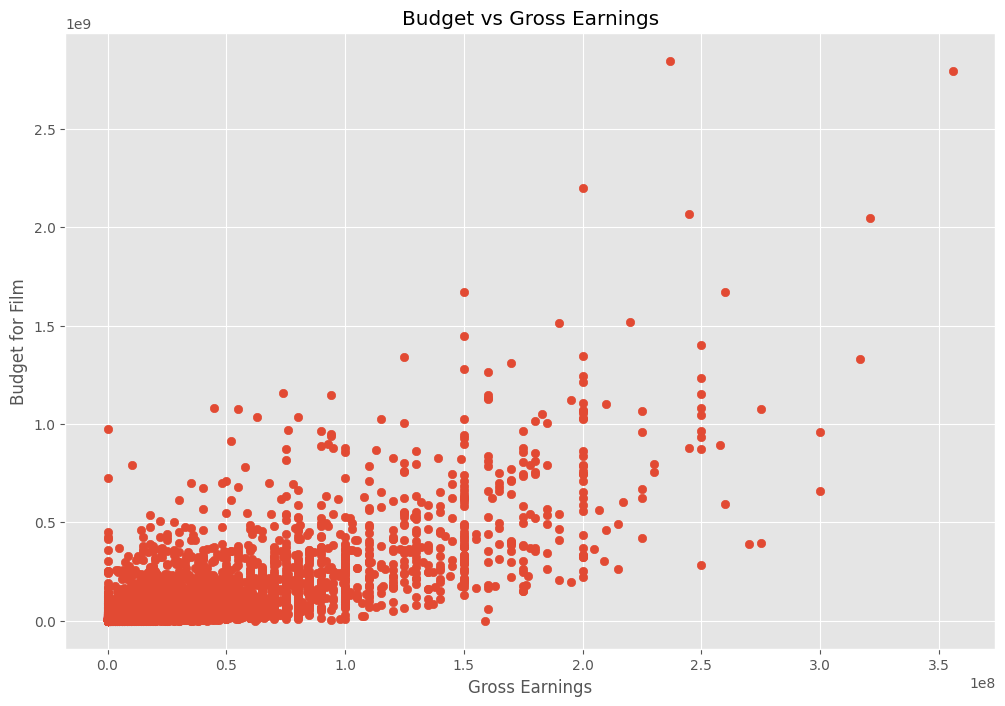

In [75]:
#Scatter Plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')
plt.show()

In [73]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


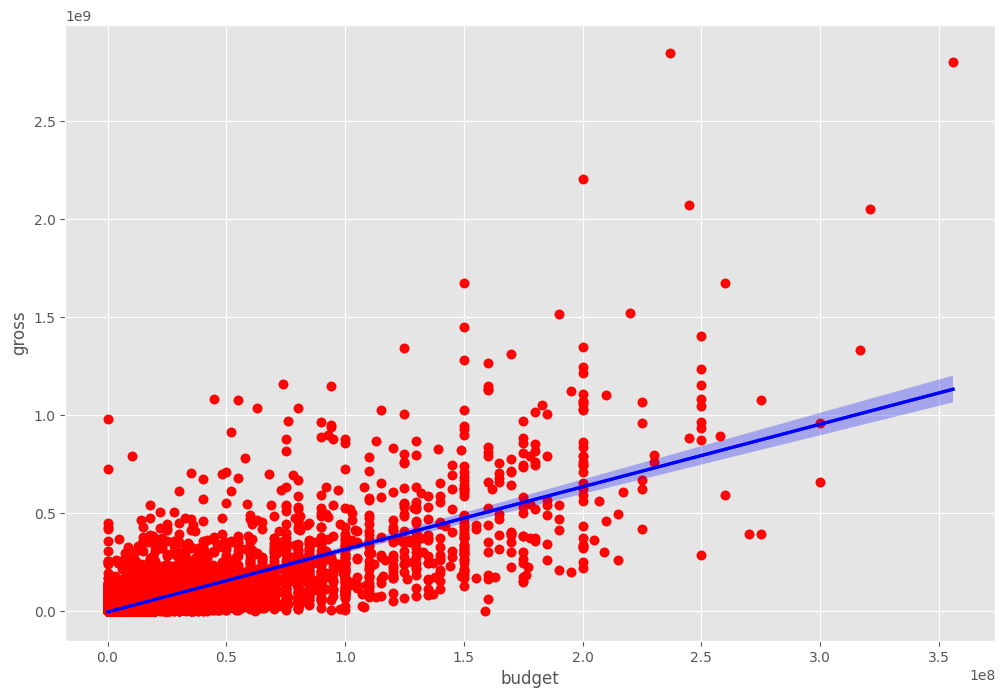

In [79]:
#Plot budget vs gross using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Create the regression plot
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

# Display the plot
plt.show()


In [137]:
#Lets start looking at Correlation

df.corr(method='pearson') #pearson, Kendall, Spearman

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,NaN,NaN,0.004202,NaN,0.014173,0.021216,NaN,NaN,NaN,NaN,0.023449,0.026802,NaN,0.020357,-0.001072
rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.004202,NaN,NaN,1.000000,NaN,0.092616,0.222427,NaN,NaN,NaN,NaN,0.309212,0.261900,NaN,0.116358,-0.030299
released,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,0.014173,NaN,NaN,0.092616,NaN,1.000000,0.407101,NaN,NaN,NaN,NaN,0.056863,0.186012,NaN,0.394564,-0.001062
votes,0.021216,NaN,NaN,0.222427,NaN,0.407101,1.000000,NaN,NaN,NaN,NaN,0.486931,0.632870,NaN,0.306984,-0.018677
director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


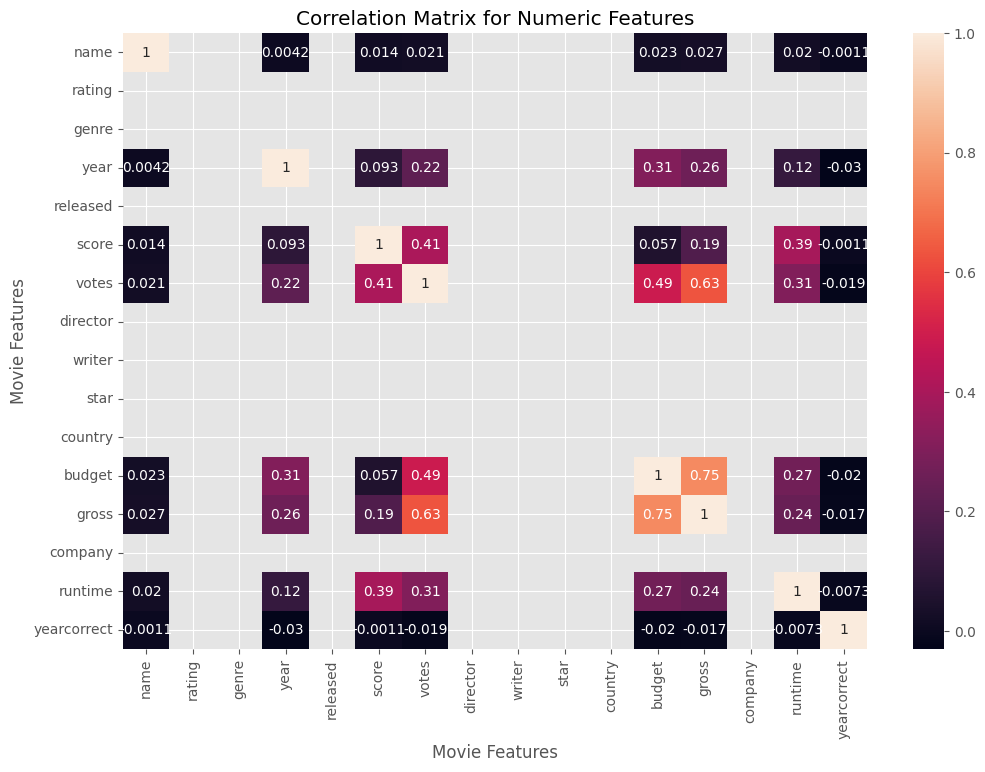

In [141]:
#High corelation between budget and gross

correlation_matrix=df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [157]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,0.0,0.0,0.0,2009,0.0,7.8,1100000.0,0.0,0.0,0.0,0.0,237000000,2847246203,0.0,162.0,0.0
7445,0.0,0.0,0.0,2019,0.0,8.4,903000.0,0.0,0.0,0.0,0.0,356000000,2797501328,0.0,181.0,0.0
3045,0.0,0.0,0.0,1997,0.0,7.8,1100000.0,0.0,0.0,0.0,0.0,200000000,2201647264,0.0,194.0,0.0
6663,0.0,0.0,0.0,2015,0.0,7.8,876000.0,0.0,0.0,0.0,0.0,245000000,2069521700,0.0,138.0,0.0
7244,0.0,0.0,0.0,2018,0.0,8.4,897000.0,0.0,0.0,0.0,0.0,321000000,2048359754,0.0,149.0,0.0


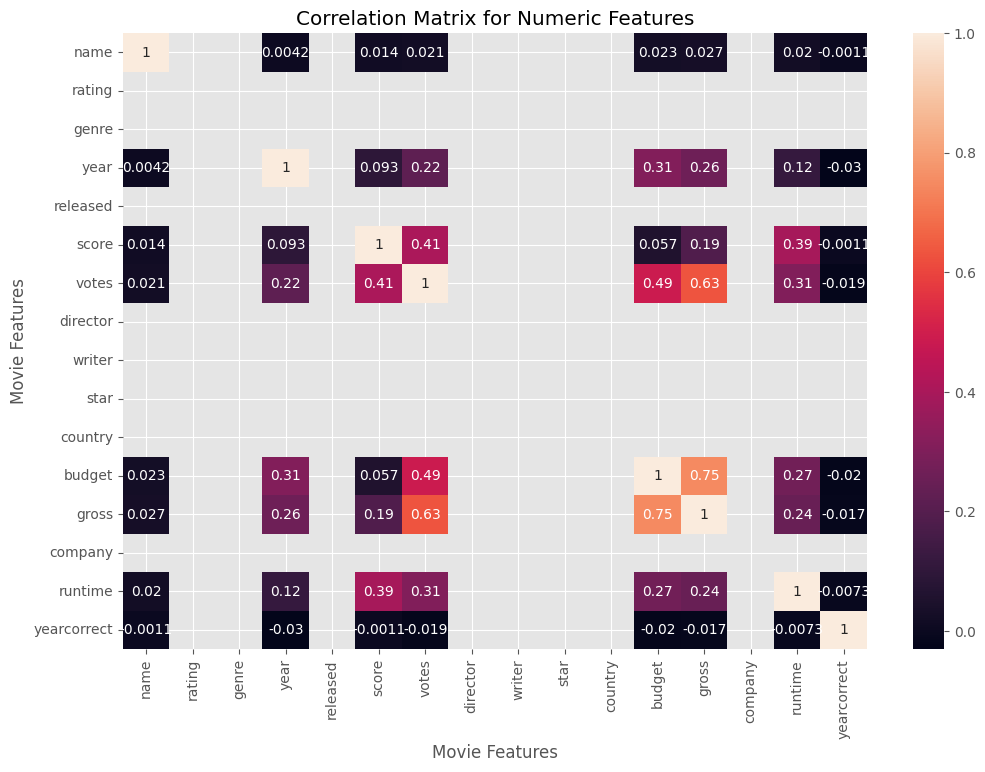

In [145]:
correlation_matrix=df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [151]:
# Compute the correlation matrix first by calling the method
correlation_mat = df_numerized.corr()

# Now unstack the correlation matrix
corr_pairs = correlation_mat.unstack()

# Optionally, you can filter out the pairs with correlation of 1 (self-correlation)
corr_pairs = corr_pairs[corr_pairs != 1]

print(corr_pairs)


name         rating              NaN
             genre               NaN
             year           0.004202
             released            NaN
             score          0.014173
             votes          0.021216
             director            NaN
             writer              NaN
             star                NaN
             country             NaN
             budget         0.023449
             gross          0.026802
             company             NaN
             runtime        0.020357
             yearcorrect   -0.001072
rating       name                NaN
             rating              NaN
             genre               NaN
             year                NaN
             released            NaN
             score               NaN
             votes               NaN
             director            NaN
             writer              NaN
             star                NaN
             country             NaN
             budget              NaN
 

In [153]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

year         yearcorrect   -0.030299
yearcorrect  year          -0.030299
budget       yearcorrect   -0.020497
yearcorrect  budget        -0.020497
             votes         -0.018677
votes        yearcorrect   -0.018677
gross        yearcorrect   -0.016753
yearcorrect  gross         -0.016753
runtime      yearcorrect   -0.007333
yearcorrect  runtime       -0.007333
name         yearcorrect   -0.001072
yearcorrect  name          -0.001072
             score         -0.001062
score        yearcorrect   -0.001062
year         name           0.004202
name         year           0.004202
score        name           0.014173
name         score          0.014173
             runtime        0.020357
runtime      name           0.020357
name         votes          0.021216
votes        name           0.021216
budget       name           0.023449
name         budget         0.023449
gross        name           0.026802
name         gross          0.026802
budget       score          0.056863
s

In [155]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes   gross     0.632870
gross   votes     0.632870
budget  gross     0.750157
gross   budget    0.750157
dtype: float64

In [ ]:
# Company has low correlation